In [1]:
import pandas as pd 
import re

In [2]:
from datasets import load_dataset

ds = load_dataset("Salesforce/wikitext", "wikitext-2-v1")

In [3]:
ds

DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

In [4]:
train_ds = ds["train"]
val_ds = ds["validation"]
test_ds = ds["test"]

In [5]:
train_df = pd.concat([pd.DataFrame(train_ds), pd.DataFrame(val_ds)], ignore_index=True)
test_df = pd.DataFrame(test_ds)

In [6]:
def normalizer(s: str):
    s = s.lower()
    s = re.sub(r'[^\w\s]', ' ', s) 
    s = re.sub(r'\d+', ' ', s)
    s = re.sub(r'\s+', ' ', s)
    
    s = s.strip()
    return s

In [7]:
def pre_process(df: pd.DataFrame):
    df["text"] = df["text"].apply(normalizer)
    df = df.drop(df[df.text.apply(lambda x: len(x.split())) < 2].index)
    df.reset_index(drop=True, inplace=True)
    return df 

In [8]:
train_df = pre_process(train_df)

In [9]:
train_df

,text
0,valkyria chronicles iii
1,senjō no valkyria unk chronicles japanese 戦場のヴ...
2,the game began development in carrying over a ...
3,it met with positive sales in japan and was pr...
4,as with previous unk chronicles games valkyria...
...,...
23291,unk describes herself as optimistic cynical la...
23292,during a production of hamlet unk met her futu...
23293,unk has undertaken the following roles from he...
23294,film roles


In [10]:
test_df = pre_process(test_df)
test_df

,text
0,robert unk
1,robert unk is an english film television and t...
2,in unk starred alongside unk in the play unk w...
3,in unk had a guest starring role on the televi...
4,he had a recurring role in on two episodes of ...
...,...
2592,unk s years movies th unk edition unk
2593,unk s top sports film
2594,in the decades since its release the unk has c...
2595,paul newman reprised his role as fast eddie un...


<Axes: ylabel='Frequency'>

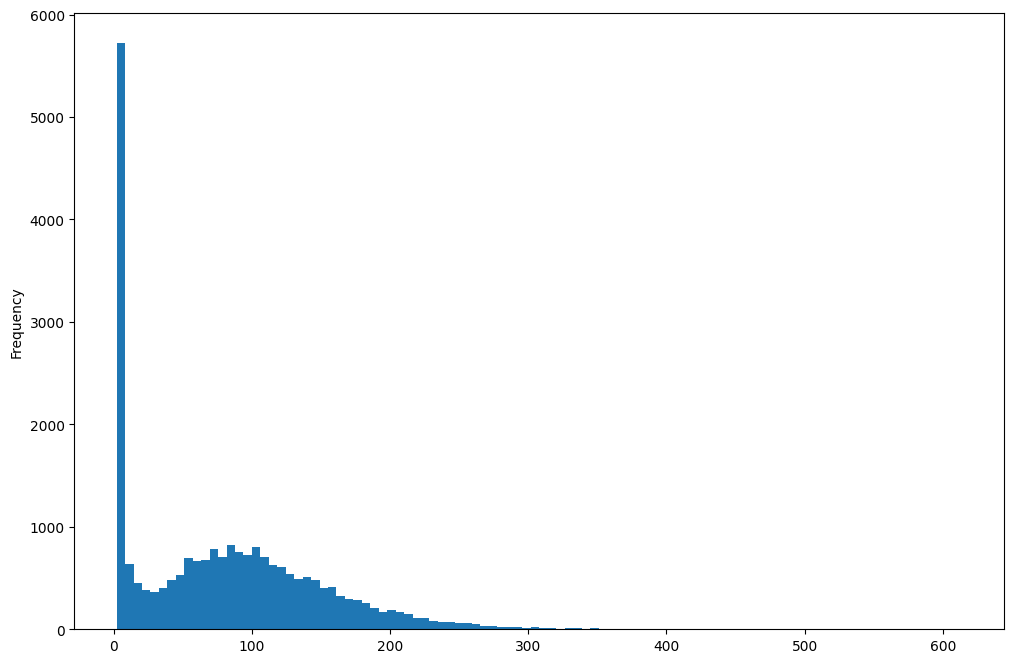

In [11]:
train_df['text'].apply(lambda x: len(x.split())).plot(kind='hist', bins=100, figsize=(12, 8))

<Axes: ylabel='Frequency'>

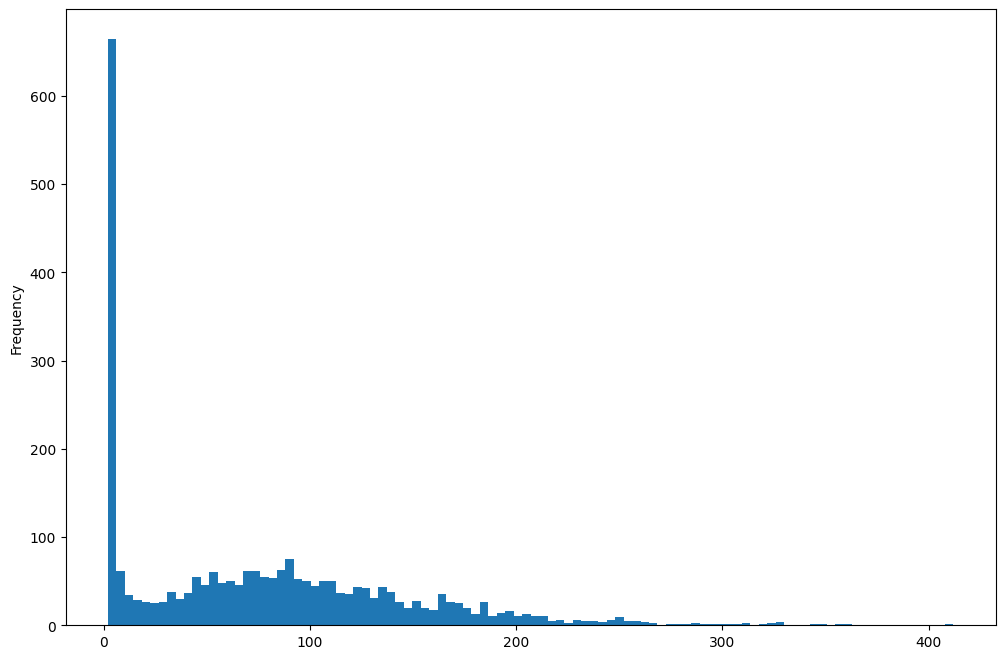

In [12]:
test_df['text'].apply(lambda x: len(x.split())).plot(kind='hist', bins=100, figsize=(12, 8))

In [13]:
test_df['text'].apply(lambda x: len(x.split())).describe()

count    2597.000000
mean       76.472083
std        68.830919
min         2.000000
25%         6.000000
50%        68.000000
75%       118.000000
max       412.000000
Name: text, dtype: float64

In [14]:
train_df['text'].apply(lambda x: len(x.split())).describe()

count    23296.000000
mean        80.128391
std         68.910651
min          2.000000
25%          9.000000
50%         74.000000
75%        124.000000
max        614.000000
Name: text, dtype: float64

In [15]:
train_df.to_csv("data/train.csv", index=False)

In [16]:
test_df.to_csv("data/test.csv", index=False)